In [513]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

## Importing data

In [514]:
df = pd.read_csv('Speed_Dating_Data.csv', encoding = 'unicode_escape')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Checking how many times people wanted to go on a second date (1) vs not (0).

In [515]:
df['dec_o'].value_counts()

0    4863
1    3515
Name: dec_o, dtype: int64

Some of the waves used a different preference measurement scale (1-10), while the rest used a 100pt allocation system. I will remove waves 6-9.

In [516]:
df = df[df.wave != 6]
df = df[df.wave != 7]
df = df[df.wave != 8]
df = df[df.wave != 9]

Creating a new dataframe which only includes the variables that I think can impact one's decision to go on the second date. They are: gender, age, race, whehter partner is the same race, importance of attractivenes of a potential partner, importance of intellignece of a potential partner, importance of the potential partner being fun and their perceived attractivenes,intellignece and fun of the partner in question. Also "dec_o" which will be used for prediction.

In [533]:
df_new = df[['gender','age','samerace','race', "attr1_1", "intel1_1", "fun1_1", "attr", "intel", "fun","dec_o" ]]
df_new.head()

,gender,age,samerace,race,attr1_1,intel1_1,fun1_1,attr,intel,fun,dec_o
0,0,21.0,0,4.0,15.0,20.0,15.0,6.0,7.0,7.0,0
1,0,21.0,0,4.0,15.0,20.0,15.0,7.0,7.0,8.0,0
2,0,21.0,1,4.0,15.0,20.0,15.0,5.0,9.0,8.0,1
3,0,21.0,0,4.0,15.0,20.0,15.0,7.0,8.0,7.0,1
4,0,21.0,0,4.0,15.0,20.0,15.0,5.0,7.0,7.0,1


In [534]:
df_new = df_new.apply (pd.to_numeric, errors='coerce')
df_new = df_new.dropna()


In [535]:
df_new.describe()

,gender,age,samerace,race,attr1_1,intel1_1,fun1_1,attr,intel,fun,dec_o
count,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000
mean,0.501966,26.271112,0.391571,2.814436,23.816995,20.607069,17.347345,6.163532,7.323872,6.382686,0.425696
std,0.500035,3.549112,0.488140,1.248531,13.257735,7.483024,6.714246,1.950196,1.559365,1.966873,0.494487
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,2.000000,15.000000,17.500000,12.000000,5.000000,6.000000,5.000000,0.000000
50%,1.000000,26.000000,0.000000,2.000000,20.000000,20.000000,18.000000,6.000000,7.000000,7.000000,0.000000
75%,1.000000,28.000000,1.000000,4.000000,30.000000,25.000000,20.000000,7.750000,8.000000,8.000000,1.000000
max,1.000000,55.000000,1.000000,6.000000,100.000000,50.000000,50.000000,10.000000,10.000000,10.000000,1.000000


### In the new dataframe, there are 6359 participants aging from 18 to 55, with 26 as the average age.

In [536]:
df_new.shape

(6359, 11)

there's 6359 rows with 11 columns

In [537]:
df_new['gender'].value_counts()

1    3192
0    3167
Name: gender, dtype: int64

After cleaning some data we still have about an even split of males and females. 

## Exploring data

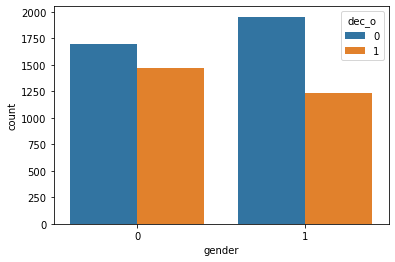

In [538]:
sns.countplot(x="gender", hue="dec_o", data=df_new)
plt.show()

Above we can see that males are much more likely to say no to the 2nd date compared to saying yes. Females on the other hand are about as likely to say yes or no. Compared to each other, women said yes more than men did. Men said no more than women did.

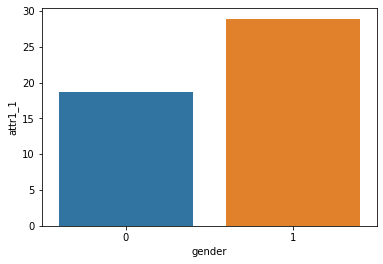

In [548]:
df_2 = df_new.groupby('gender').mean()
df_2.reset_index(inplace=True)

sns.barplot(x='gender', y="attr1_1", data=df_2);


Bar graph above shows that , on average, males find attractiveness of the potential partner more important than females.


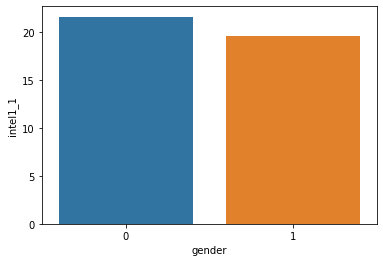

In [540]:
sns.barplot(x='gender', y="intel1_1", data=df_2);


Bar graph above shows that, on average, females find intelligence of the potential partner slightly more important than males.


## Spliting data into test and train.

In [541]:
from sklearn.model_selection import train_test_split

X = df_new.loc[:,'gender':'fun'] 
y = df_new['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## Training the algorithm

In [542]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [543]:
rf.score(X_test,y_test)

0.6168763102725366

## Evaluating model

In [544]:
rf.classes_

array([0, 1])

In [547]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
cm = pd.DataFrame(cm, index=['no 2nd date (actual)', '2nd date (actual)'], columns = ['no 2nd date (pred)', '2nd date (pred)']) 
cm

,no 2nd date (pred),2nd date (pred)
no 2nd date (actual),771,335
2nd date (actual),396,406


In [546]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1106
           1       0.55      0.51      0.53       802

    accuracy                           0.62      1908
   macro avg       0.60      0.60      0.60      1908
weighted avg       0.61      0.62      0.61      1908



The accuracy is 0.62, which means the model is not very accurate in predicting willingness to go on a second date.

The model is 66% precise in predicting "no second date", and 55% precise in predicting second date.

70% of the "no second date" was predicted correctly and only 51% of second date was predicted correctly.

## Conclusion

Based on the outcome, we can say that the variables indicating one's belief of importance of attractiveness and intelligence of the potential partner are not going to influence their decision to go on a second date even if the partner scores higher on those scales. In addition to these variables, adding age, gender and race variables does not increase the accuracy of the model.